In [5]:
import gymnasium as gym
import pandas as pd
from stable_baselines3 import DQN, PPO
from stable_baselines3.common.evaluation import evaluate_policy
import highway_env

# Load models
dqn_model = DQN.load("./highway_dqn/baseline_model")
ppo_model = PPO.load("./highway_ppo/baseline_model")
dqn_cnn_model = DQN.load("highway_cnn/model")


In [37]:
def evaluate_performance(model, env_config, num_episodes=10):
    env = gym.make('highway-fast-v0', render_mode='rgb_array')
    env.configure(env_config)
    env.reset()
    mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=num_episodes)
    return mean_reward, std_reward

# Define configurations for each scenario
configurations = [
    {"controlled_vehicles": 1, "vehicles_count": 20, "lanes_count": 3, "description": "Base Environment"},
    {"controlled_vehicles": 1, "vehicles_count": 40, "lanes_count": 3, "description": "Higher Vehicles Count"},
    {"controlled_vehicles": 1, "vehicles_count": 20, "lanes_count": 6, "description": "Higher Lanes Count"},
]

# Results table
results = []

for config in configurations:

    dqn_performance = evaluate_performance(dqn_model, config)
    ppo_performance = evaluate_performance(ppo_model, config)
    config.update(
        {"observation": {
            "type": "GrayscaleObservation",
            "observation_shape": (128, 64),
            "stack_size": 4,
            "weights": [0.2989, 0.5870, 0.1140],  # weights for RGB conversion
            "scaling": 1.75,
        }})
    dqn_cnn_performance = evaluate_performance(dqn_cnn_model, config)

    
    results.append({
        "Scenario": config["description"],
        "DQN Mean Reward": dqn_performance[0],
        "PPO Mean Reward": ppo_performance[0],
        "DQN CNN Mean Reward": dqn_cnn_performance[0] if config["controlled_vehicles"] == 1 else "N/A"
    })

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)
print(results_df)


/Users/jonathanhu/anaconda3/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.configure to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.configure` for environment variables or `env.get_wrapper_attr('configure')` that will search the reminding wrappers.
  logger.warn(
/Users/jonathanhu/anaconda3/lib/python3.11/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(
/Users/jonathanhu/anaconda3/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.configure to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.configure` for enviro

                Scenario  DQN Mean Reward  PPO Mean Reward  \
0       Base Environment        20.699262        20.820221   
1  Higher Vehicles Count        15.953726        17.766887   
2     Higher Lanes Count        21.316783        18.830853   

   DQN CNN Mean Reward  
0            21.120221  
1            20.720221  
2            21.380221  


In [36]:
from HighwayEnv.scripts.utils import record_videos

# Define configurations for each scenario
configurations = [
    {"controlled_vehicles": 1, "vehicles_count": 20, "lanes_count": 3, "description": "Base Environment"},
    {"controlled_vehicles": 1, "vehicles_count": 40, "lanes_count": 3, "description": "Higher Vehicles Count"},
    {"controlled_vehicles": 1, "vehicles_count": 20, "lanes_count": 6, "description": "Higher Lanes Count"},
]

def evaluate_and_record(model, env_config, name, num_episodes=1):
    env = gym.make('highway-fast-v0', render_mode='rgb_array')
    env = record_videos(env, video_folder=name)
    env.unwrapped.set_record_video_wrapper(env)
    env.configure({"simulation_frequency": 15})  # Higher FPS for rendering)
    
    env.configure(env_config)
    env.reset()
    mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=num_episodes)
    return mean_reward, std_reward

for config in configurations:

    dqn_performance = evaluate_and_record(dqn_model, config, f"./highway_DQN_{config['description']}")
    ppo_performance = evaluate_and_record(ppo_model, config, f"./highway_PPO_{config['description']}")
    config.update(
        {"observation": {
            "type": "GrayscaleObservation",
            "observation_shape": (128, 64),
            "stack_size": 4,
            "weights": [0.2989, 0.5870, 0.1140],  # weights for RGB conversion
            "scaling": 1.75,
        }})
    dqn_cnn_performance = evaluate_and_record(dqn_cnn_model, config, f"./highway_DQNCNN_{config['description']}")

/Users/jonathanhu/anaconda3/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.configure to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.configure` for environment variables or `env.get_wrapper_attr('configure')` that will search the reminding wrappers.
  logger.warn(
/Users/jonathanhu/anaconda3/lib/python3.11/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(
t:  62%|██████▏   | 278/451 [14:41<00:00, 891.68it/s, now=None]

Moviepy - Building video /Users/jonathanhu/autonomous_driving_sim/highway_DQN_Base Environment/rl-video-episode-0.mp4.
Moviepy - Writing video /Users/jonathanhu/autonomous_driving_sim/highway_DQN_Base Environment/rl-video-episode-0.mp4



t:  62%|██████▏   | 278/451 [14:41<00:00, 891.68it/s, now=None]/Users/jonathanhu/anaconda3/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.configure to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.configure` for environment variables or `env.get_wrapper_attr('configure')` that will search the reminding wrappers.
  logger.warn(
/Users/jonathanhu/anaconda3/lib/python3.11/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Moviepy - Done !
Moviepy - video ready /Users/jonathanhu/autonomous_driving_sim/highway_DQN_Base Environment/rl-video-episode-0.mp4


t:  62%|██████▏   | 278/451 [14:42<00:00, 891.68it/s, now=None]

Moviepy - Building video /Users/jonathanhu/autonomous_driving_sim/highway_PPO_Base Environment/rl-video-episode-0.mp4.
Moviepy - Writing video /Users/jonathanhu/autonomous_driving_sim/highway_PPO_Base Environment/rl-video-episode-0.mp4



t:  62%|██████▏   | 278/451 [14:42<00:00, 891.68it/s, now=None]/Users/jonathanhu/anaconda3/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.configure to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.configure` for environment variables or `env.get_wrapper_attr('configure')` that will search the reminding wrappers.
  logger.warn(
/Users/jonathanhu/anaconda3/lib/python3.11/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Moviepy - Done !
Moviepy - video ready /Users/jonathanhu/autonomous_driving_sim/highway_PPO_Base Environment/rl-video-episode-0.mp4


t:  62%|██████▏   | 278/451 [14:44<00:00, 891.68it/s, now=None]

Moviepy - Building video /Users/jonathanhu/autonomous_driving_sim/highway_DQNCNN_Base Environment/rl-video-episode-0.mp4.
Moviepy - Writing video /Users/jonathanhu/autonomous_driving_sim/highway_DQNCNN_Base Environment/rl-video-episode-0.mp4



t:  62%|██████▏   | 278/451 [14:45<00:00, 891.68it/s, now=None]/Users/jonathanhu/anaconda3/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.configure to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.configure` for environment variables or `env.get_wrapper_attr('configure')` that will search the reminding wrappers.
  logger.warn(
/Users/jonathanhu/anaconda3/lib/python3.11/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Moviepy - Done !
Moviepy - video ready /Users/jonathanhu/autonomous_driving_sim/highway_DQNCNN_Base Environment/rl-video-episode-0.mp4


t:  62%|██████▏   | 278/451 [14:48<00:00, 891.68it/s, now=None]

Moviepy - Building video /Users/jonathanhu/autonomous_driving_sim/highway_DQN_Higher Vehicles Count/rl-video-episode-0.mp4.
Moviepy - Writing video /Users/jonathanhu/autonomous_driving_sim/highway_DQN_Higher Vehicles Count/rl-video-episode-0.mp4



t:  62%|██████▏   | 278/451 [14:49<00:00, 891.68it/s, now=None]/Users/jonathanhu/anaconda3/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.configure to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.configure` for environment variables or `env.get_wrapper_attr('configure')` that will search the reminding wrappers.
  logger.warn(
/Users/jonathanhu/anaconda3/lib/python3.11/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Moviepy - Done !
Moviepy - video ready /Users/jonathanhu/autonomous_driving_sim/highway_DQN_Higher Vehicles Count/rl-video-episode-0.mp4


t:  62%|██████▏   | 278/451 [14:53<00:00, 891.68it/s, now=None]

Moviepy - Building video /Users/jonathanhu/autonomous_driving_sim/highway_PPO_Higher Vehicles Count/rl-video-episode-0.mp4.
Moviepy - Writing video /Users/jonathanhu/autonomous_driving_sim/highway_PPO_Higher Vehicles Count/rl-video-episode-0.mp4



t:  62%|██████▏   | 278/451 [14:53<00:00, 891.68it/s, now=None]/Users/jonathanhu/anaconda3/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.configure to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.configure` for environment variables or `env.get_wrapper_attr('configure')` that will search the reminding wrappers.
  logger.warn(
/Users/jonathanhu/anaconda3/lib/python3.11/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Moviepy - Done !
Moviepy - video ready /Users/jonathanhu/autonomous_driving_sim/highway_PPO_Higher Vehicles Count/rl-video-episode-0.mp4


t:  62%|██████▏   | 278/451 [14:57<00:00, 891.68it/s, now=None]

Moviepy - Building video /Users/jonathanhu/autonomous_driving_sim/highway_DQNCNN_Higher Vehicles Count/rl-video-episode-0.mp4.
Moviepy - Writing video /Users/jonathanhu/autonomous_driving_sim/highway_DQNCNN_Higher Vehicles Count/rl-video-episode-0.mp4



t:  62%|██████▏   | 278/451 [14:58<00:00, 891.68it/s, now=None]/Users/jonathanhu/anaconda3/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.configure to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.configure` for environment variables or `env.get_wrapper_attr('configure')` that will search the reminding wrappers.
  logger.warn(
/Users/jonathanhu/anaconda3/lib/python3.11/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Moviepy - Done !
Moviepy - video ready /Users/jonathanhu/autonomous_driving_sim/highway_DQNCNN_Higher Vehicles Count/rl-video-episode-0.mp4


t:  62%|██████▏   | 278/451 [14:59<00:00, 891.68it/s, now=None]

Moviepy - Building video /Users/jonathanhu/autonomous_driving_sim/highway_DQN_Higher Lanes Count/rl-video-episode-0.mp4.
Moviepy - Writing video /Users/jonathanhu/autonomous_driving_sim/highway_DQN_Higher Lanes Count/rl-video-episode-0.mp4



t:  62%|██████▏   | 278/451 [14:59<00:00, 891.68it/s, now=None]/Users/jonathanhu/anaconda3/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.configure to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.configure` for environment variables or `env.get_wrapper_attr('configure')` that will search the reminding wrappers.
  logger.warn(
/Users/jonathanhu/anaconda3/lib/python3.11/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Moviepy - Done !
Moviepy - video ready /Users/jonathanhu/autonomous_driving_sim/highway_DQN_Higher Lanes Count/rl-video-episode-0.mp4


t:  62%|██████▏   | 278/451 [15:02<00:00, 891.68it/s, now=None]

Moviepy - Building video /Users/jonathanhu/autonomous_driving_sim/highway_PPO_Higher Lanes Count/rl-video-episode-0.mp4.
Moviepy - Writing video /Users/jonathanhu/autonomous_driving_sim/highway_PPO_Higher Lanes Count/rl-video-episode-0.mp4



t:  62%|██████▏   | 278/451 [15:02<00:00, 891.68it/s, now=None]/Users/jonathanhu/anaconda3/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.configure to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.configure` for environment variables or `env.get_wrapper_attr('configure')` that will search the reminding wrappers.
  logger.warn(
/Users/jonathanhu/anaconda3/lib/python3.11/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Moviepy - Done !
Moviepy - video ready /Users/jonathanhu/autonomous_driving_sim/highway_PPO_Higher Lanes Count/rl-video-episode-0.mp4


t:  62%|██████▏   | 278/451 [15:05<00:00, 891.68it/s, now=None]

Moviepy - Building video /Users/jonathanhu/autonomous_driving_sim/highway_DQNCNN_Higher Lanes Count/rl-video-episode-0.mp4.
Moviepy - Writing video /Users/jonathanhu/autonomous_driving_sim/highway_DQNCNN_Higher Lanes Count/rl-video-episode-0.mp4



t:  62%|██████▏   | 278/451 [15:06<00:00, 891.68it/s, now=None]

Moviepy - Done !
Moviepy - video ready /Users/jonathanhu/autonomous_driving_sim/highway_DQNCNN_Higher Lanes Count/rl-video-episode-0.mp4


             Scenario  DQN Mean Reward  PPO Mean Reward  DQN CNN Mean Reward
     Base Environment        20.699262        20.820221            21.120221
Higher Vehicles Count        15.953726        17.766887            20.720221
   Higher Lanes Count        21.316783        18.830853            21.380221


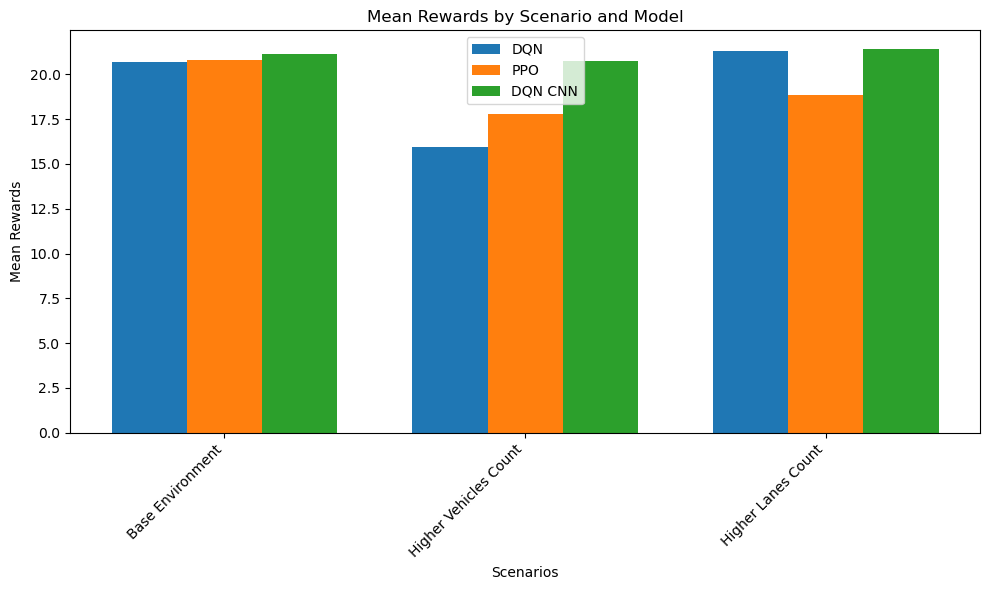

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Print DataFrame in a pretty format
print(results_df.to_string(index=False))

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.25  # the width of the bars
scenarios = results_df['Scenario']
x = np.arange(len(scenarios))  # the label locations

# Plot each model's performance
rects1 = ax.bar(x - bar_width, results_df['DQN Mean Reward'], bar_width, label='DQN')
rects2 = ax.bar(x, results_df['PPO Mean Reward'], bar_width, label='PPO')
rects3 = ax.bar(x + bar_width, results_df['DQN CNN Mean Reward'], bar_width, label='DQN CNN')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Scenarios')
ax.set_ylabel('Mean Rewards')
ax.set_title('Mean Rewards by Scenario and Model')
ax.set_xticks(x)
ax.set_xticklabels(scenarios, rotation=45, ha="right")
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()
